In [102]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

In [103]:
# Load the dataset
sampled_df = pd.read_csv('random42.csv')


C:\Users\DAYDREAMER\AppData\Local\Temp\ipykernel_21196\1070546342.py:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  sampled_df = pd.read_csv('random42.csv')


In [104]:
cols = ['loan_amnt', 'term', 'int_rate', 'grade', 'home_ownership',
'loan_status','addr_state', 'application_type', 'fico_range_low', 'fico_range_high']

In [105]:
Data = sampled_df[cols].copy()

## Data Cleaning
1. Delete Unwanted cols
2. change data types

In [106]:
Data.dtypes

loan_amnt           float64
term                 object
int_rate            float64
grade                object
home_ownership       object
loan_status          object
addr_state           object
application_type     object
fico_range_low      float64
fico_range_high     float64
dtype: object

In [107]:
Data['grade'].value_counts()
# Chnage all letters to numbers

grade
B    14732
C    14395
A     9468
D     7137
E     3043
F      947
G      276
Name: count, dtype: int64

In [108]:
import seaborn as sns

In [109]:
colors = ['#031D44','#04395E','#70A288','#DAB785','#D5896F']
# Set the style and color palette
sns.set(style="whitegrid")
sns.set_palette(colors)

# Selecting coloumns to exclude
exclude = ['loan_status' ,'loan_amnt' , 'int_rate' ,'fico_range_low', 'fico_range_high' , 'addr_state' ]

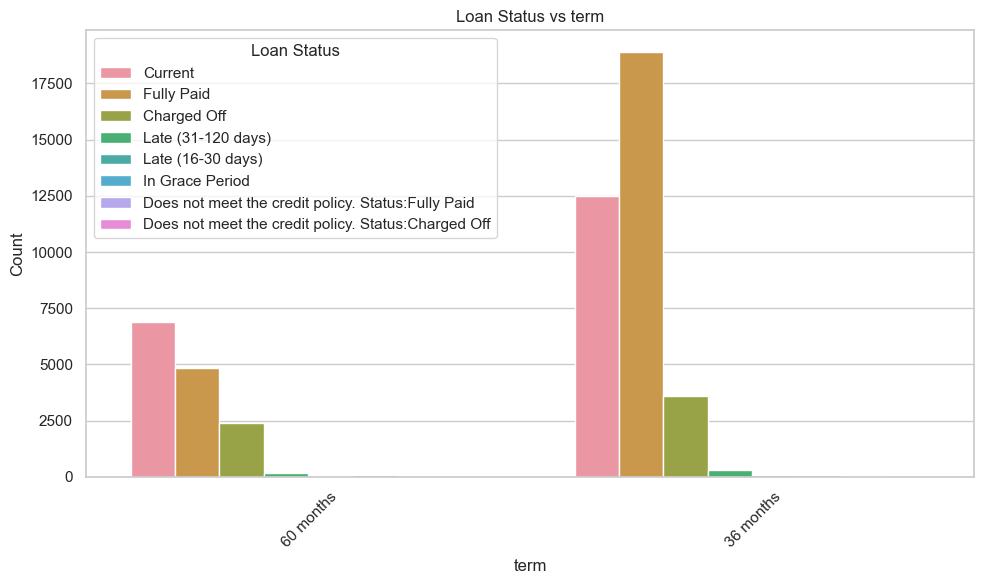

Percentage Share of Loan Status for each term:
term        loan_status                                        
 36 months  Fully Paid                                             53.211061
            Current                                                35.131790
            Charged Off                                            10.169062
            Late (31-120 days)                                      0.888914
            In Grace Period                                         0.281302
            Late (16-30 days)                                       0.210976
            Does not meet the credit policy. Status:Fully Paid      0.061886
            Does not meet the credit policy. Status:Charged Off     0.045008
 60 months  Current                                                47.622673
            Fully Paid                                             33.600941
            Charged Off                                            16.610146
            Late (31-120 days)            

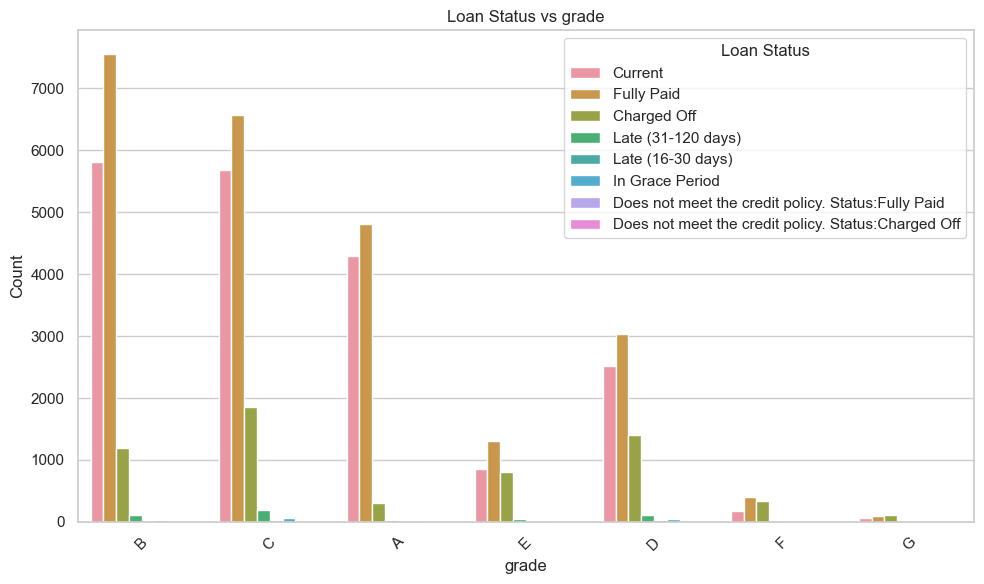

Percentage Share of Loan Status for each grade:
grade  loan_status                                        
A      Fully Paid                                             50.781580
       Current                                                45.289396
       Charged Off                                             3.263625
       Late (31-120 days)                                      0.380228
       In Grace Period                                         0.126743
       Late (16-30 days)                                       0.116181
       Does not meet the credit policy. Status:Fully Paid      0.031686
       Does not meet the credit policy. Status:Charged Off     0.010562
B      Fully Paid                                             51.276134
       Current                                                39.437958
       Charged Off                                             8.111594
       Late (31-120 days)                                      0.746674
       In Grace Period       

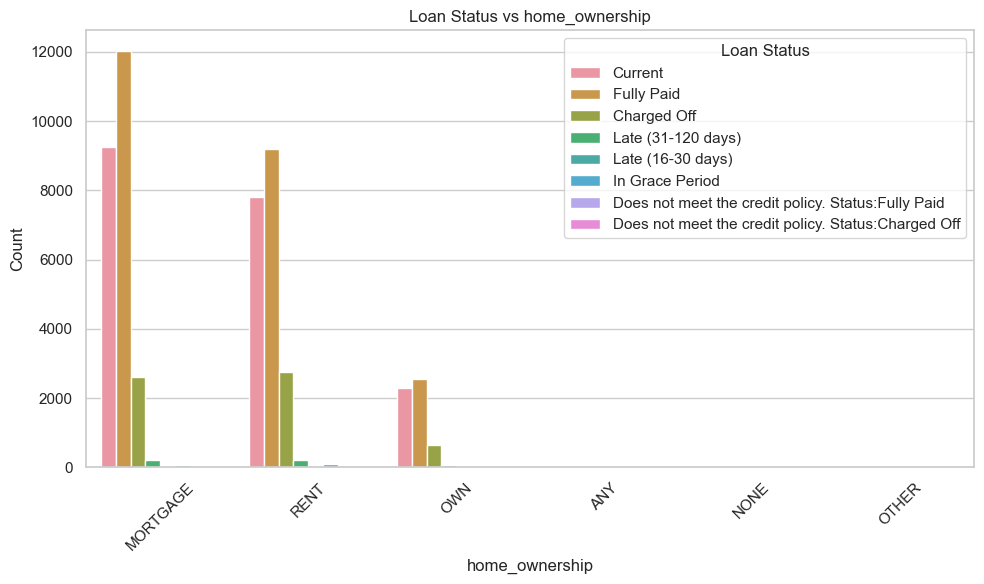

Percentage Share of Loan Status for each home_ownership:
home_ownership  loan_status                                        
ANY             Current                                                79.166667
                Fully Paid                                             20.833333
MORTGAGE        Fully Paid                                             49.552559
                Current                                                38.203637
                Charged Off                                            10.808693
                Late (31-120 days)                                      0.849520
                In Grace Period                                         0.313415
                Late (16-30 days)                                       0.185575
                Does not meet the credit policy. Status:Fully Paid      0.053610
                Does not meet the credit policy. Status:Charged Off     0.032991
NONE            Charged Off                                      

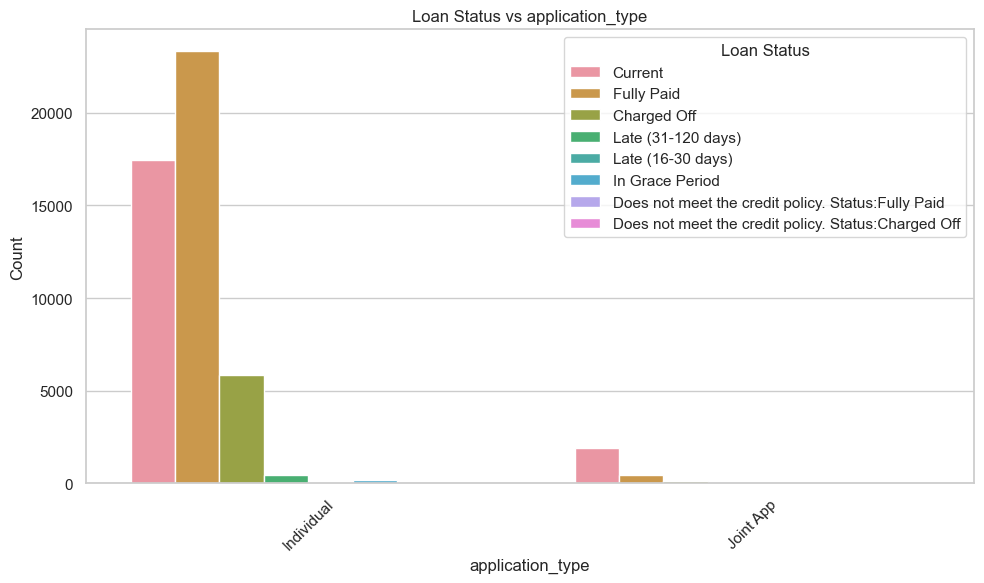

Percentage Share of Loan Status for each application_type:
application_type  loan_status                                        
Individual        Fully Paid                                             49.214152
                  Current                                                36.792473
                  Charged Off                                            12.383705
                  Late (31-120 days)                                      0.966224
                  In Grace Period                                         0.345984
                  Late (16-30 days)                                       0.206747
                  Does not meet the credit policy. Status:Fully Paid      0.050632
                  Does not meet the credit policy. Status:Charged Off     0.040084
Joint App         Current                                                74.316519
                  Fully Paid                                             17.058144
                  Charged Off            

In [110]:
# Comparing loan amount against every other column to gain insights
# List of all column names (excluding 'loan_status')
insights = [col for col in Data.columns if col != 'loan_status' and col not in exclude]


# Iterate through each column and create a plot
for column in insights:
    plt.figure(figsize=(10, 6))  

    percentage_share = Data.groupby(column)['loan_status'].value_counts(normalize=True) * 100
    
    sns.countplot(x=column, hue='loan_status', data=Data)
    plt.title(f'Loan Status vs {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.legend(title='Loan Status')
    plt.xticks(rotation=45)  
    plt.tight_layout() 
    plt.show()

    # Print the percentage share of each category within the column
    print(f"Percentage Share of Loan Status for each {column}:")
    print(percentage_share)

Common THEMES

Joint Applications Mitigate Charge-off Risk: Joint applications exhibit lower charge-off rates, suggesting a shared responsibility that reduces default likelihood.

Homeownership Correlates with Lower Charge-off Rates: Borrowers who own homes demonstrate greater financial stability, resulting in reduced charge-off probabilities.

Concerns Surround Grades F and G: Loans assigned to grades F and G exhibit heightened risk profiles, warranting closer scrutiny due to elevated charge-off probabilities.

Longer Loan Terms Heighten Default Risk: Loans with 60-month terms are associated with increased charge-off and late payment incidences, indicating higher default likelihood over extended repayment periods.

Risk Escalates with Lower Grade Assignments: The risk of default amplifies as loan grades decrease. Grade G loans, in particular, exhibit notably higher charge-off rates compared to fully paid statuses.

In [111]:
x = Data['loan_amnt'].sum()

In [112]:
x/50000

15023.227

In [113]:
# Define the bin edges for the loan amounts
bins = [0, 10000, 15000, 20000, float('inf')]  # Bin edges: [0, 5000, 10000, 15000, infinity]

# Define the labels for each group
labels = ['Less than 5000', '5001-10000', '10001-15000', 'Greater than 15000']

# Create a new column 'loan_amnt_group' containing the bin labels for each loan amount
Data['loan_amnt_group'] = pd.cut(Data['loan_amnt'], bins=bins, labels=labels, right=False)

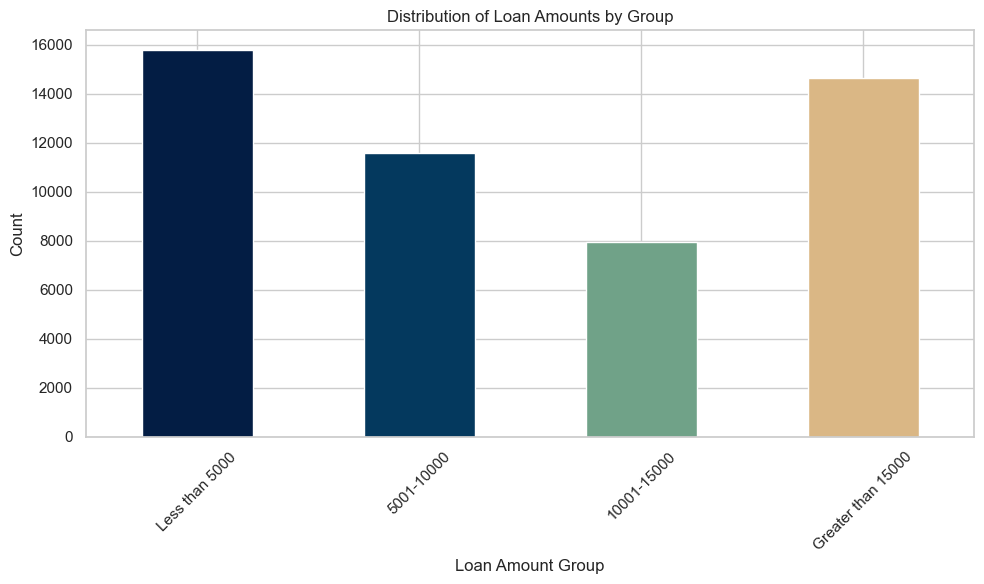

In [114]:
# Plot the histogram
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
Data['loan_amnt_group'].value_counts().sort_index().plot(kind='bar', color=colors)
plt.title('Distribution of Loan Amounts by Group')
plt.xlabel('Loan Amount Group')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent overlap of labels
plt.show()

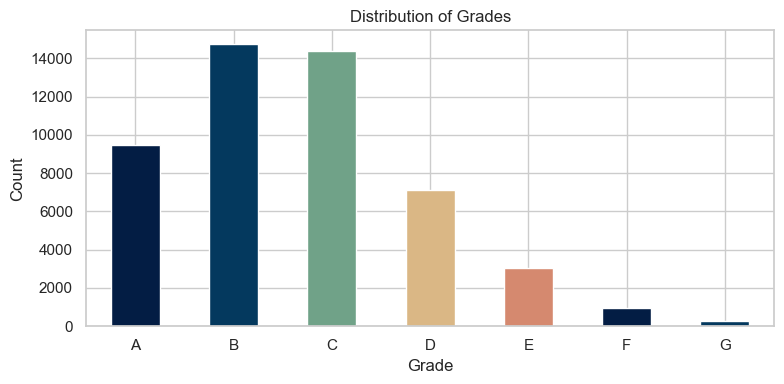

In [115]:
# Calculate sum and average loan amount for each grade
grade_stats = Data.groupby('grade')['loan_amnt'].agg(['sum', 'mean'])

# Plot the histogram
plt.figure(figsize=(8, 4))  # Adjust figure size if needed
ax = Data['grade'].value_counts().sort_index().plot(kind='bar', color=colors)
plt.title('Distribution of Grades')
plt.xlabel('Grade')
plt.ylabel('Count')

plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.tight_layout()  #  Adjust layout to prevent overlap of labels
plt.show()

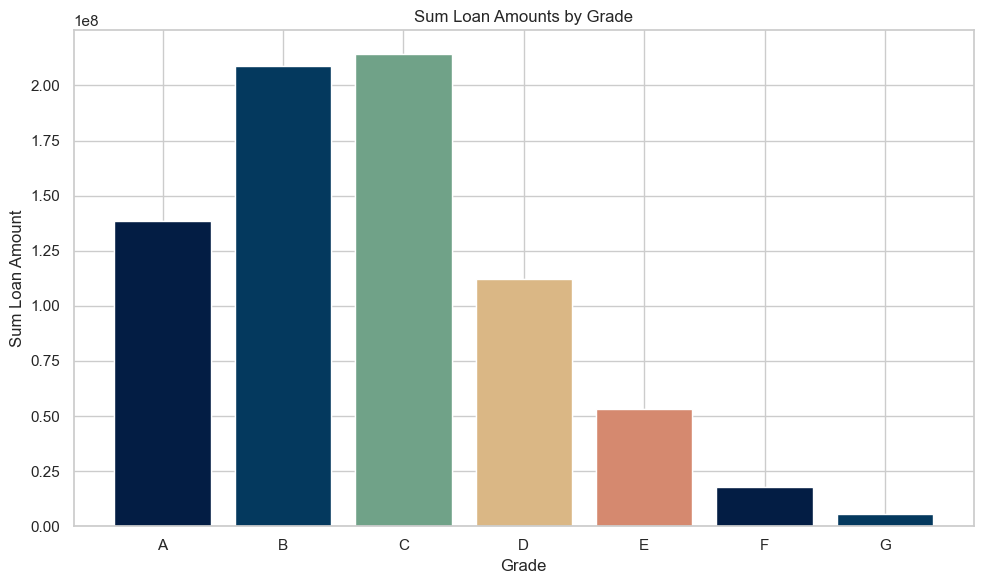

In [116]:
fig, ax = plt.subplots(figsize=(10, 6))

# Plot sum loan amounts as bars
ax.bar(grade_stats.index, grade_stats['sum'], color=colors)
ax.bar(grade_stats.index, grade_stats['sum'], color=colors)
# Add labels, title, and grid
ax.set_xlabel('Grade')
ax.set_ylabel('Sum Loan Amount')
ax.set_title('Sum Loan Amounts by Grade')
ax.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

In [117]:
Data.drop('loan_amnt_group', axis=1, inplace=True)

C:\Users\DAYDREAMER\anaconda3\an\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
C:\Users\DAYDREAMER\anaconda3\an\Lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)
C:\Users\DAYDREAMER\anaconda3\an\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


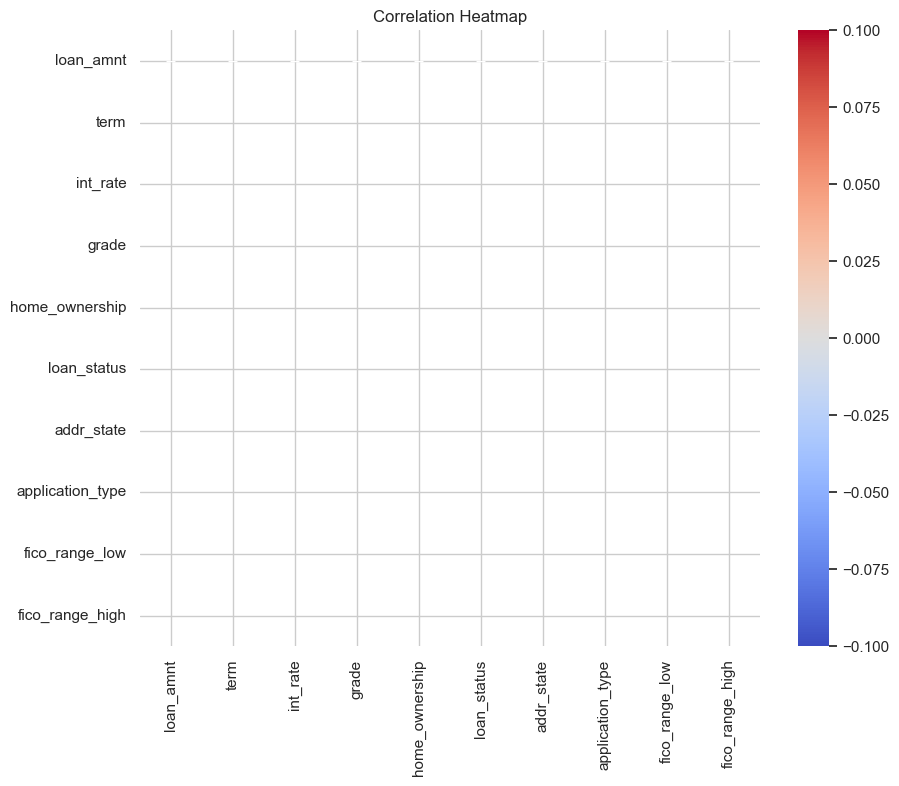

In [118]:
CO = Data[Data['loan_status'] == 2]
# Create a heatmap
plt.figure(figsize=(10, 8))  
sns.heatmap(CO.corr(), annot=True, cmap='coolwarm', fmt=".2f")  # Plot the heatmap with correlation values as annotations
plt.title('Correlation Heatmap')  # Set the title of the plot
plt.show()  # Show the plot

In [119]:
# Add this to markdown
# Completed this to all columns to make sure data is wither float or int
Data.dtypes
Data['loan_status'].value_counts()

loan_status
Fully Paid                                             23771
Current                                                19370
Charged Off                                             6015
Late (31-120 days)                                       505
In Grace Period                                          186
Late (16-30 days)                                        108
Does not meet the credit policy. Status:Fully Paid        24
Does not meet the credit policy. Status:Charged Off       19
Name: count, dtype: int64

In [120]:
Data['loan_status'].value_counts()

loan_status
Fully Paid                                             23771
Current                                                19370
Charged Off                                             6015
Late (31-120 days)                                       505
In Grace Period                                          186
Late (16-30 days)                                        108
Does not meet the credit policy. Status:Fully Paid        24
Does not meet the credit policy. Status:Charged Off       19
Name: count, dtype: int64

# Cleaning starts here

In [121]:

# Mapping values to dictionaries
TermD = {" 36 months":1, " 60 months":0}
gradeD = {'A':0,'B':1,'C':2, 'D': 3, 'E': 4, 'F': 5, 'G': 6}
HomeD = {'MORTGAGE': 0, 'RENT': 1, 'OWN': 2, 'ANY': 3, 'NONE': 4, 'OTHER': 5}
LoanD = {'Fully Paid': 0,  'Current':1 , 'Charged Off':2 , 'Late (31-120 days)':3, 'In Grace Period':4 ,
         'Late (16-30 days)':5 ,'Does not meet the credit policy. Status:Fully Paid':0 ,
         "Does not meet the credit policy. Status:Charged Off": 2 }
states = Data['addr_state'].unique()

# Create a mapping dictionary for state abbreviations to numbers
addrD = {state: i for i, state in enumerate(states)}
addrD = {key: value for key, value in addrD.items() if not isinstance(value, float) or not math.isnan(value)}
addrD.popitem()
typeD = {'Individual':0,'Joint App':1}

In [122]:
colstoclean = ['term','grade','home_ownership',
              'loan_status','addr_state','application_type']
mappedvar = [TermD,gradeD,HomeD,LoanD,addrD,typeD]

for i in range(len(colstoclean)):
    Data[colstoclean[i]] = Data[colstoclean[i]].map(mappedvar[i])

Data

,loan_amnt,term,int_rate,grade,home_ownership,loan_status,addr_state,application_type,fico_range_low,fico_range_high
0,32000.0,0.0,10.49,1.0,0.0,1.0,0.0,0.0,735.0,739.0
1,9600.0,1.0,12.99,2.0,1.0,0.0,1.0,0.0,685.0,689.0
2,4000.0,1.0,6.68,0.0,0.0,0.0,1.0,0.0,780.0,784.0
3,6025.0,1.0,10.91,1.0,1.0,0.0,2.0,0.0,740.0,744.0
4,25000.0,0.0,26.30,4.0,2.0,1.0,0.0,0.0,715.0,719.0
...,...,...,...,...,...,...,...,...,...,...
49995,15000.0,1.0,12.74,2.0,0.0,0.0,6.0,0.0,675.0,679.0
49996,27500.0,1.0,12.49,1.0,1.0,0.0,0.0,0.0,680.0,684.0
49997,10000.0,1.0,15.31,2.0,1.0,0.0,2.0,0.0,695.0,699.0
49998,6025.0,1.0,11.49,1.0,1.0,1.0,2.0,0.0,665.0,669.0


In [123]:
Data.dropna(inplace=True)
Data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49998 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   loan_amnt         49998 non-null  float64
 1   term              49998 non-null  float64
 2   int_rate          49998 non-null  float64
 3   grade             49998 non-null  float64
 4   home_ownership    49998 non-null  float64
 5   loan_status       49998 non-null  float64
 6   addr_state        49998 non-null  float64
 7   application_type  49998 non-null  float64
 8   fico_range_low    49998 non-null  float64
 9   fico_range_high   49998 non-null  float64
dtypes: float64(10)
memory usage: 4.2 MB


In [124]:
# Convert to int
Data['term'] = Data['term'].astype(int)
Data['grade'] = Data['grade'].astype(int)
Data['home_ownership'] = Data['home_ownership'].astype(int)
Data['loan_status'] = Data['loan_status'].astype(int)
Data['addr_state'] = Data['addr_state'].astype(int)
Data['application_type'] = Data['application_type'].astype(int)

In [125]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [132]:
NormData = Data
NormData['loan_amnt'] = scaler.fit_transform(NormData[['loan_amnt']]) # Normalize Loan amount
NormData['int_rate'] = scaler.fit_transform(NormData[['int_rate']]) # Normalize Loan amount

In [133]:
Data

,loan_amnt,term,int_rate,grade,home_ownership,loan_status,addr_state,application_type,fico_range_low,fico_range_high
0,0.794872,0,0.201713,1,0,1,0,0,735.0,739.0
1,0.220513,1,0.299065,2,1,0,1,0,685.0,689.0
2,0.076923,1,0.053349,0,0,0,1,0,780.0,784.0
3,0.128846,1,0.218069,1,1,0,2,0,740.0,744.0
4,0.615385,0,0.817368,4,2,1,0,0,715.0,719.0
...,...,...,...,...,...,...,...,...,...,...
49995,0.358974,1,0.289330,2,0,0,6,0,675.0,679.0
49996,0.679487,1,0.279595,1,1,0,0,0,680.0,684.0
49997,0.230769,1,0.389408,2,1,0,2,0,695.0,699.0
49998,0.128846,1,0.240654,1,1,1,2,0,665.0,669.0


# Train test and spit

In [127]:
from sklearn.model_selection import train_test_split


X = Data.drop(columns=['loan_status'])  
y = Data['loan_status']  # Building a model to predict all potentinal risks

# Split the data into training and testing sets 75 training | 25 Testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [128]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, precision_recall_curve, accuracy_score

In [129]:
from sklearn.linear_model import LogisticRegression


model = LogisticRegression(max_iter=8000)  # Increase max_iter if needed

# Train the model on the training data
model.fit(X_train, y_train)

# Predict the classes for test data
y_pred = model.predict(X_test)

In [130]:
# Classification Report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.85      0.63      5916
           1       0.48      0.21      0.29      4857
           2       0.26      0.04      0.08      1524
           3       0.00      0.00      0.00       122
           4       0.00      0.00      0.00        47
           5       0.00      0.00      0.00        34

    accuracy                           0.49     12500
   macro avg       0.21      0.18      0.17     12500
weighted avg       0.45      0.49      0.42     12500



C:\Users\DAYDREAMER\anaconda3\an\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DAYDREAMER\anaconda3\an\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DAYDREAMER\anaconda3\an\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


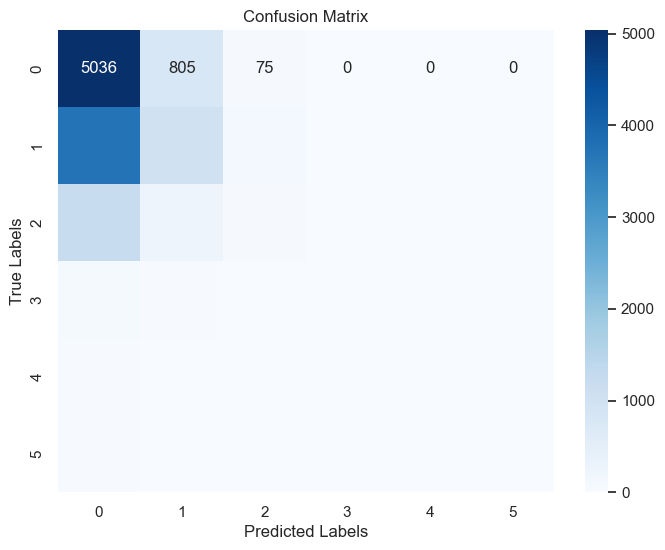

In [131]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
X = Data.drop(columns=['loan_status'])  
y = Data['loan_status']  # Building a model to predict all potentinal risks

# Split the data into training and testing sets 75 training | 25 Testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)